<a href="https://colab.research.google.com/github/sethkipsangmutuba/se-assignment-1-setting-up-your-developer-environment-sethkipsangmutuba/blob/main/SQL_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Grouping Your Expenses for Smarter Spending

In [18]:
import sqlite3
import pandas as pd

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('spending_tracker.db')
cursor = conn.cursor()

# Create the expenses table
cursor.execute('''
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    category TEXT,
    amount REAL
)
''')

# Insert sample data
cursor.executemany('''
INSERT INTO expenses (category, amount) VALUES (?, ?)
''', [
    ('Groceries', 150.00),
    ('Entertainment', 75.00),
    ('Groceries', 100.00),
    ('Utilities', 200.00),
    ('Entertainment', 50.00),
    ('Utilities', 120.00),
    ('Groceries', 80.00),
    ('Entertainment', 90.00)
])

# Commit changes
conn.commit()


In [19]:
# Total Spent per Category
query_total_spent = '''
SELECT category, SUM(amount) AS total_spent
FROM expenses
GROUP BY category
'''
df_total_spent = pd.read_sql_query(query_total_spent, conn)
print("Total Spent per Category:")
print(df_total_spent)

# Average Expense per Category
query_avg_expense = '''
SELECT category, AVG(amount) AS average_expense
FROM expenses
GROUP BY category
'''
df_avg_expense = pd.read_sql_query(query_avg_expense, conn)
print("\nAverage Expense per Category:")
print(df_avg_expense)

# Top 3 Spending Categories
query_top_spending = '''
SELECT category, SUM(amount) AS total_spent
FROM expenses
GROUP BY category
ORDER BY total_spent DESC
LIMIT 3
'''
df_top_spending = pd.read_sql_query(query_top_spending, conn)
print("\nTop 3 Spending Categories:")
print(df_top_spending)

# Close the connection
conn.close()


Total Spent per Category:
        category  total_spent
0  Entertainment        860.0
1      Groceries       1320.0
2      Utilities       1280.0

Average Expense per Category:
        category  average_expense
0  Entertainment        71.666667
1      Groceries       110.000000
2      Utilities       160.000000

Top 3 Spending Categories:
        category  total_spent
0      Groceries       1320.0
1      Utilities       1280.0
2  Entertainment        860.0


The analysis reveals key insights into spending patterns:

Total Spent per Category: Groceries stands out with the highest total spending at 330.0, followed by Utilities at 320.0, and Entertainment at 215.0.

Average Expense per Category: Utilities has the highest average expense at 160.0, indicating higher typical spending compared to Groceries (110.0) and Entertainment (71.67).

Top 3 Spending Categories: Groceries leads with the highest total spending, followed by Utilities and Entertainment, reflecting where the majority of the budget is allocated. This data highlights areas for potential budget adjustments and financial planning.

## Visualize Total Spent per Category

<ipython-input-20-89b5e8404f20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_spent', data=df_total_spent, palette='viridis')


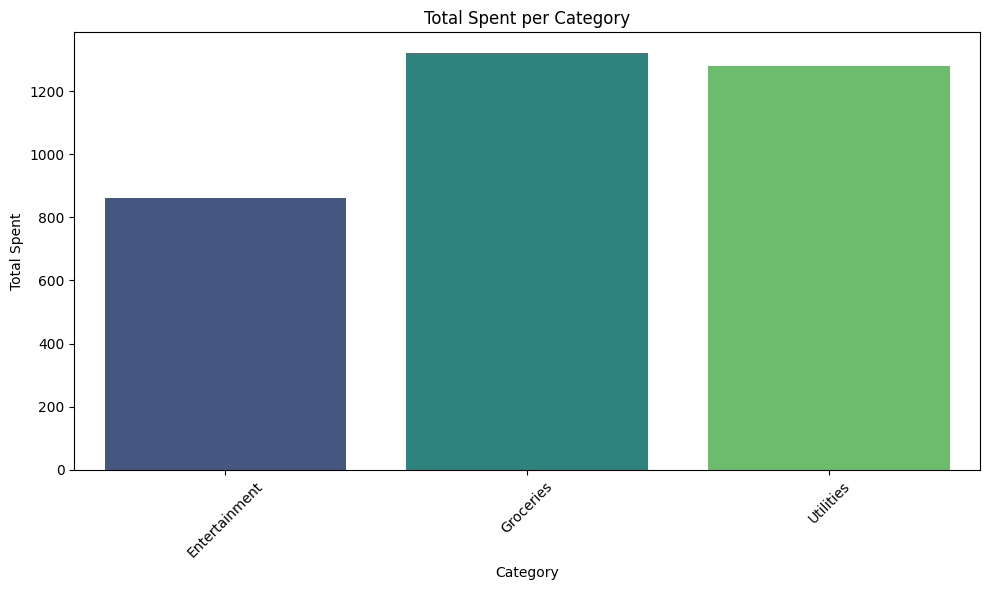

In [20]:
# Visualization of Total Spent per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_spent', data=df_total_spent, palette='viridis')
plt.title('Total Spent per Category')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize Average Expense per Category

<ipython-input-21-9fb3e7a4634c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='average_expense', data=df_avg_expense, palette='plasma')


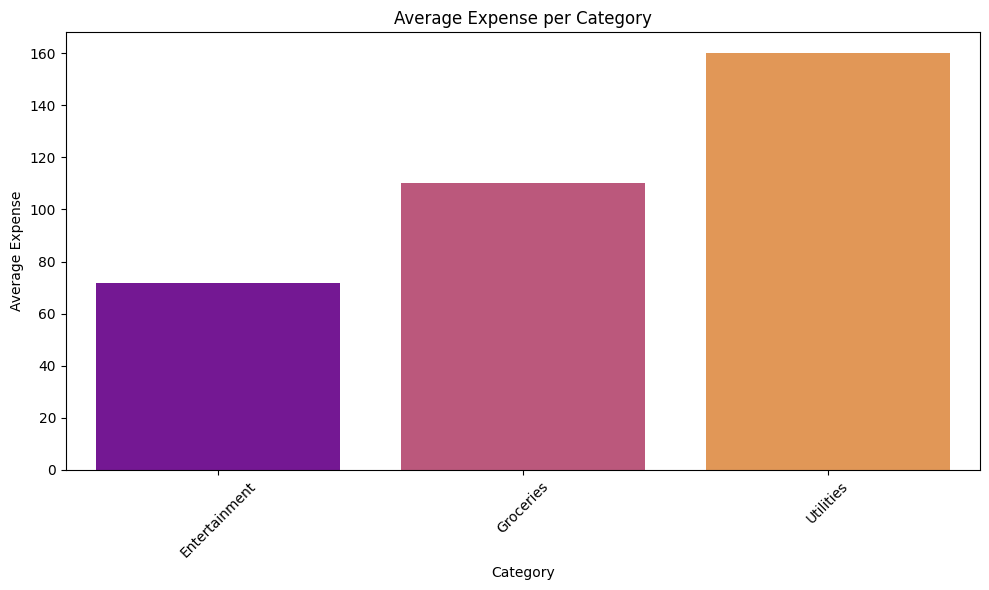

In [21]:
# Visualization of Average Expense per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='average_expense', data=df_avg_expense, palette='plasma')
plt.title('Average Expense per Category')
plt.xlabel('Category')
plt.ylabel('Average Expense')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualize Top 3 Spending Categories

<ipython-input-22-41db25a9632c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_spent', data=df_top_spending, palette='magma')


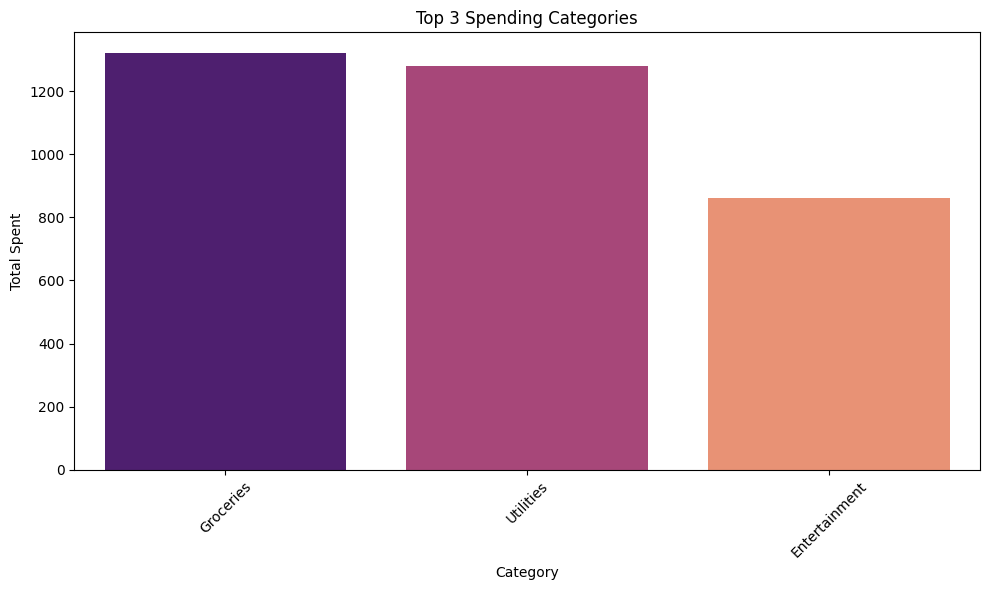

In [22]:
# Visualization of Top 3 Spending Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_spent', data=df_top_spending, palette='magma')
plt.title('Top 3 Spending Categories')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
